In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [9]:
def Data_format_Conversion(train_no, engine_id):
    df = pd.read_csv("Processed Data for RUL Pred/Processed_train_FD00{}.csv".format(train_no))
    train = df[df["ID"]==engine_id]
    train = train.drop(columns=["ID"])

    scaler=MinMaxScaler()
    train = scaler.fit_transform(train)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    features = train[:, :-1]
    target = train[:, -1]

    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

In [10]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

model=Sequential()
# CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

c:\Users\Ayush Sharma\miniconda3\envs\ml-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
Train_no=1
for engine_no in range(1,50):    
    X,y,scaler,features=Data_format_Conversion(Train_no,engine_no) 
    
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Shape of df for engine 1:  (20631, 15)
Shape of df for engine 2:  (20631, 15)
Shape of df for engine 3:  (20631, 15)
Shape of df for engine 4:  (20631, 15)
Shape of df for engine 5:  (20631, 15)
Shape of df for engine 6:  (20631, 15)
Shape of df for engine 7:  (20631, 15)
Shape of df for engine 8:  (20631, 15)
Shape of df for engine 9:  (20631, 15)
Shape of df for engine 10:  (20631, 15)
Shape of df for engine 11:  (20631, 15)
Shape of df for engine 12:  (20631, 15)
Shape of df for engine 13:  (20631, 15)
Shape of df for engine 14:  (20631, 15)
Shape of df for engine 15:  (20631, 15)
Shape of df for engine 16:  (20631, 15)
Shape of df for engine 17:  (20631, 15)
Shape of df for engine 18:  (20631, 15)
Shape of df for engine 19:  (20631, 15)
Shape of df for engine 20:  (20631, 15)
Shape of df for engine 21:  (20631, 15)
Shape of df for engine 22:  (20631, 15)
Shape of df for engine 23:  (20631, 15)
Shape of df for engine 24:  (20631, 15)
Shape of df for engine 25:  (20631, 15)
Shape of 

Shape of df for engine 10:  (20631, 15)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 10.022920861093676


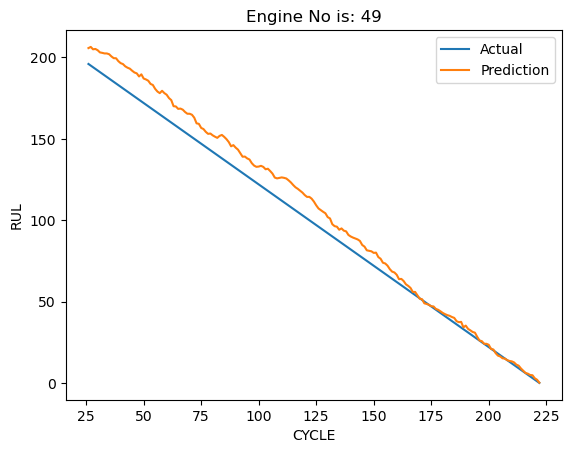



Shape of df for engine 59:  (20631, 15)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 10.57478996049314


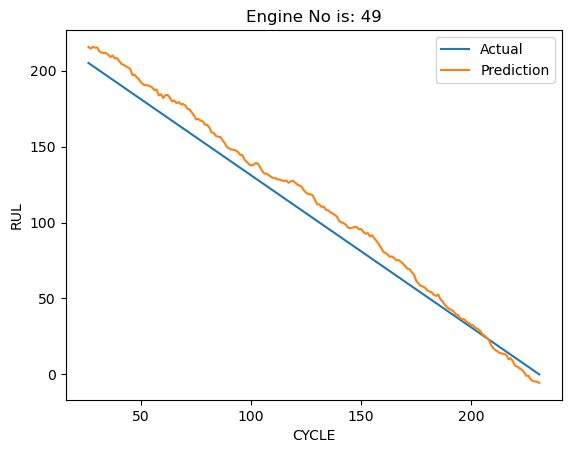



Shape of df for engine 12:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 2.2277055716042233


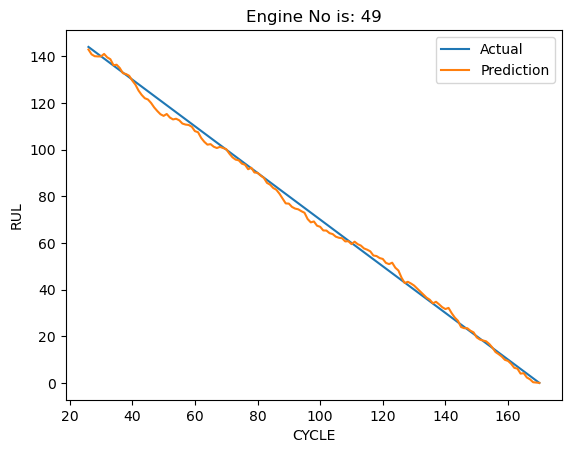



Shape of df for engine 59:  (20631, 15)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RMSE on This set: 10.57478996049314


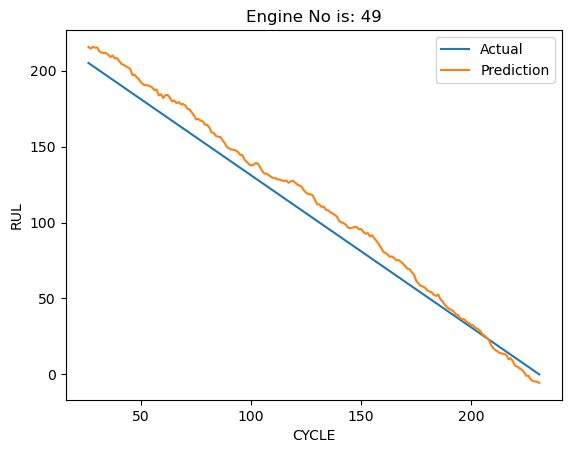



Shape of df for engine 50:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 4.312422827512081


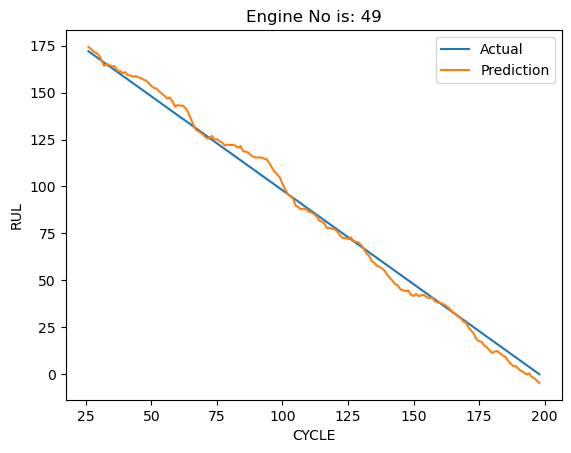

In [14]:
Train_no=1


m = np.random.randint(low=1,high=60,size=5) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_Conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed Data for RUL Pred/Processed_train_FD00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

Shape of df for engine 66:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 9.503226094437913


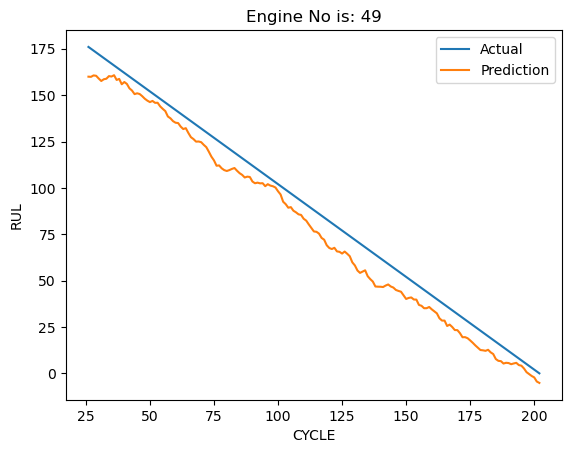



Shape of df for engine 82:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 6.89217438267209


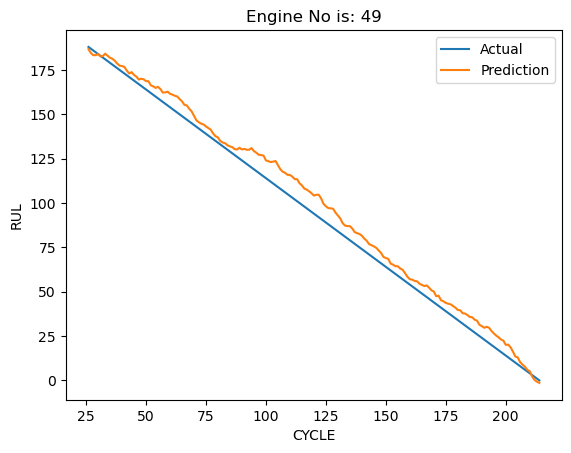



Shape of df for engine 74:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 16.149542709386346


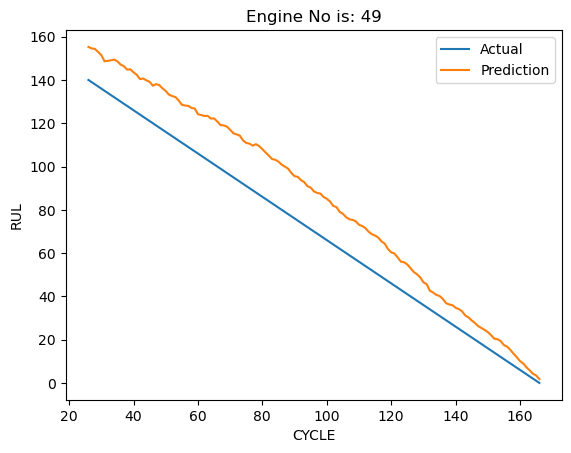



Shape of df for engine 78:  (20631, 15)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 11.178530731350097


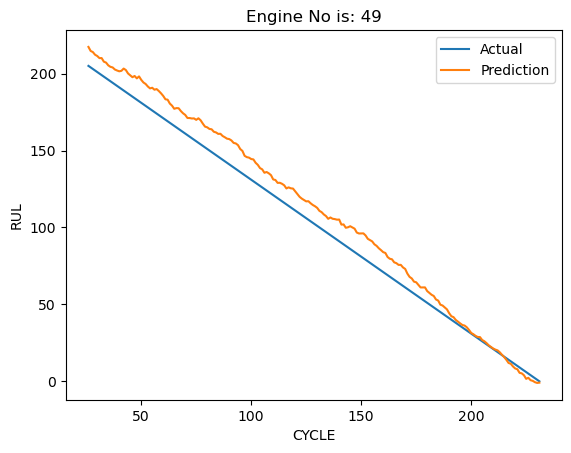



Shape of df for engine 83:  (20631, 15)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 11.314093969331106


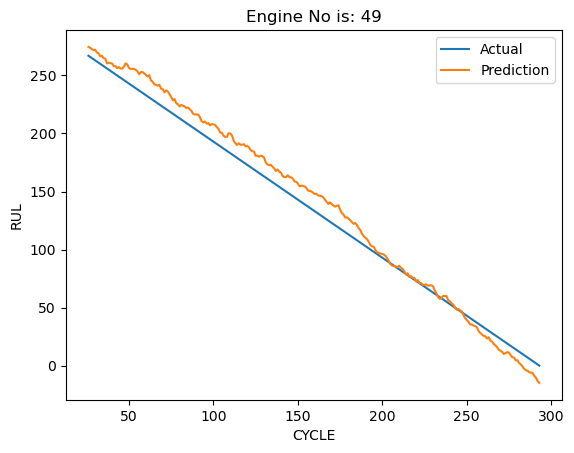



Shape of df for engine 72:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 4.8198982173042


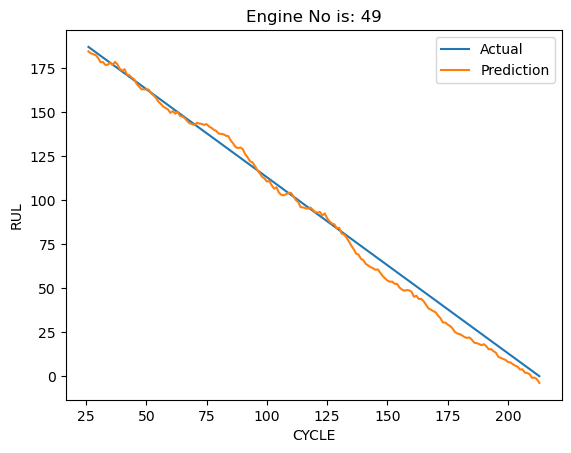



Shape of df for engine 82:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 6.89217438267209


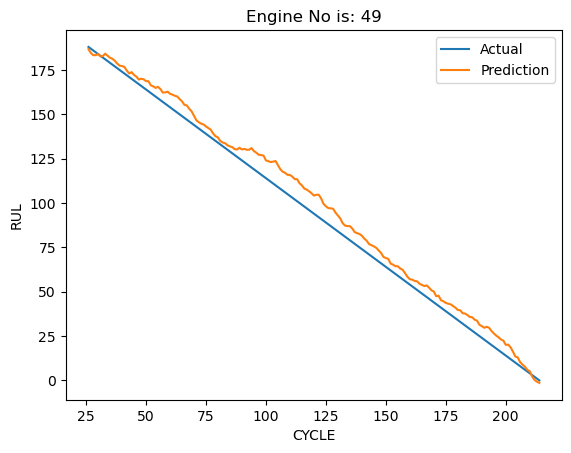



Shape of df for engine 95:  (20631, 15)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RMSE on This set: 7.2346649178541425


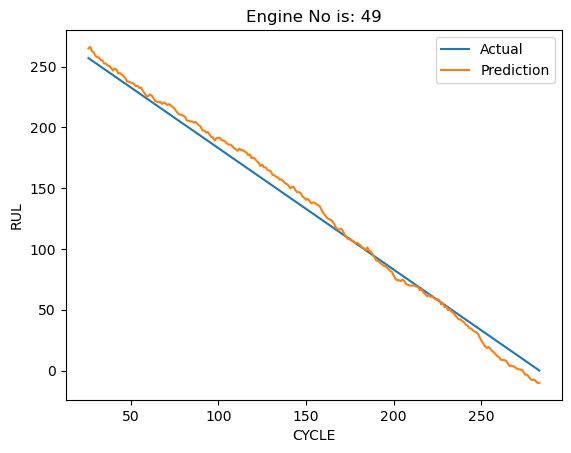



Shape of df for engine 91:  (20631, 15)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 2.747286950329875


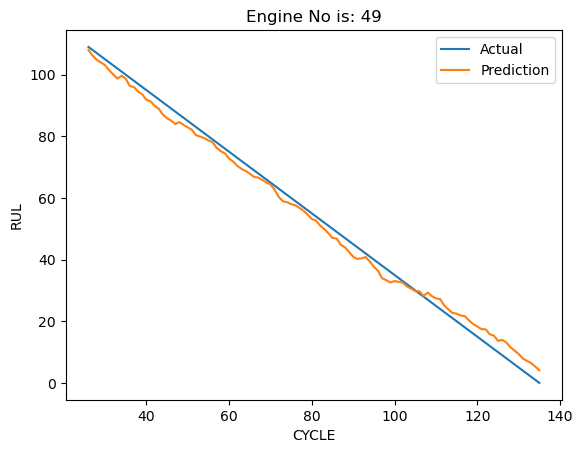



Shape of df for engine 75:  (20631, 15)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 5.513067762664247


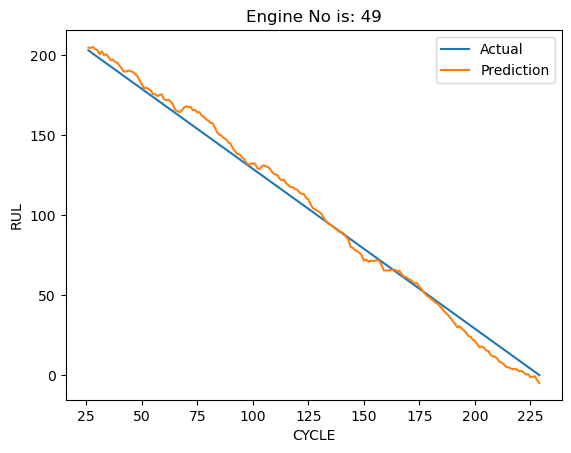



Shape of df for engine 87:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 3.1288183818981437


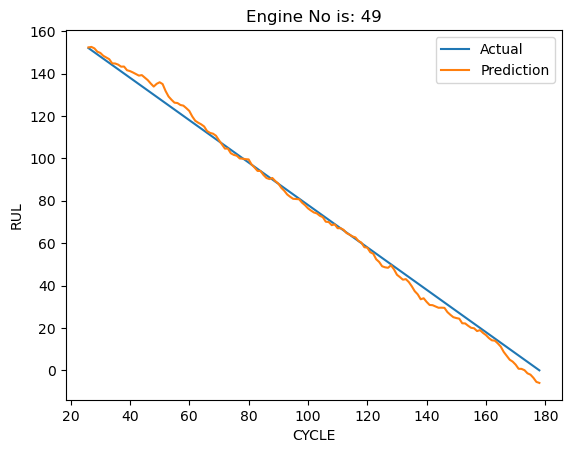



Shape of df for engine 69:  (20631, 15)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE on This set: 6.979959108746387


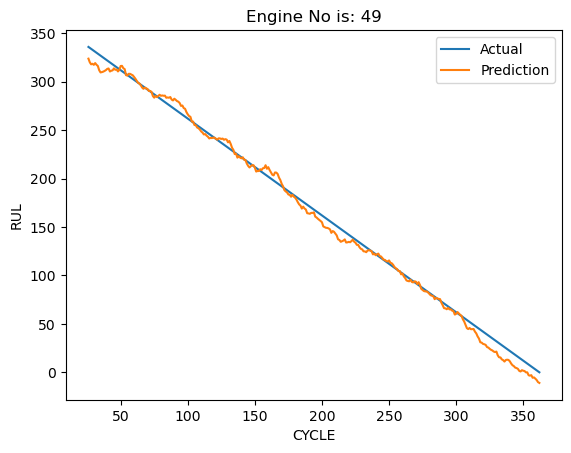



Shape of df for engine 91:  (20631, 15)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 2.747286950329875


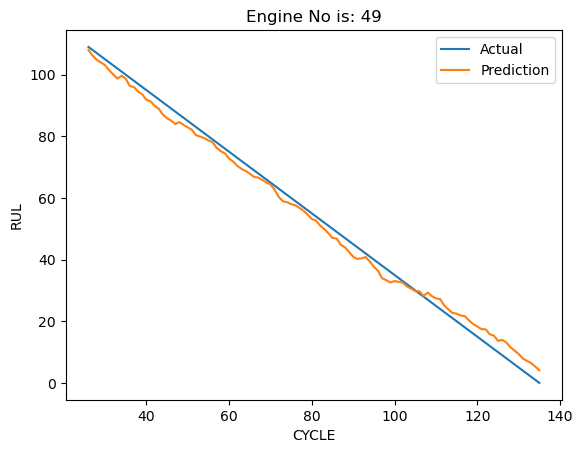



Shape of df for engine 88:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 7.339072756582337


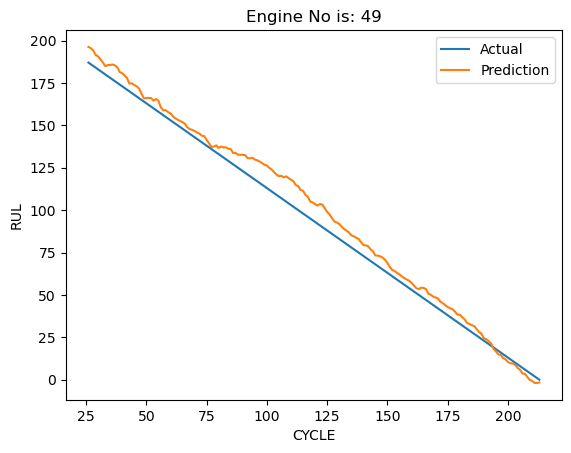



Shape of df for engine 62:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 3.8973320875544086


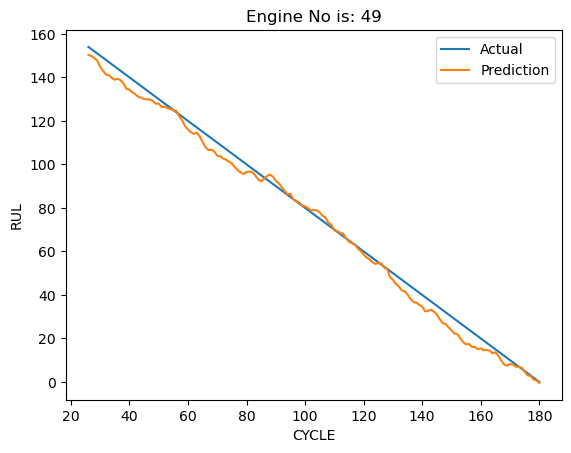



Shape of df for engine 89:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 11.391026477878974


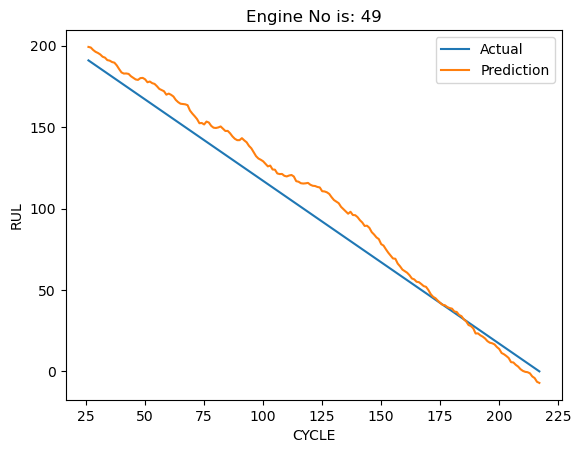



Shape of df for engine 71:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 7.2478157683022815


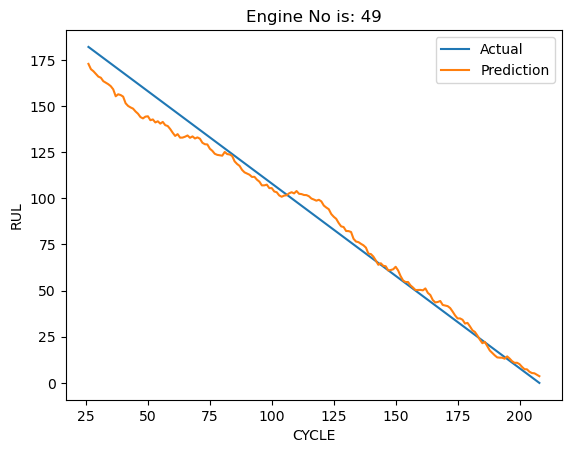



Shape of df for engine 76:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 9.6980390508374


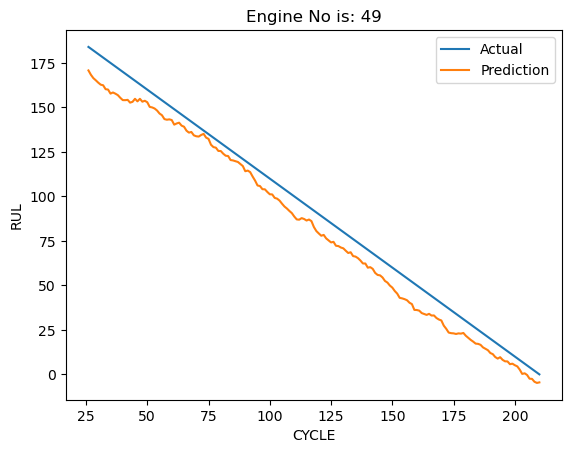



Shape of df for engine 94:  (20631, 15)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE on This set: 17.099708788372762


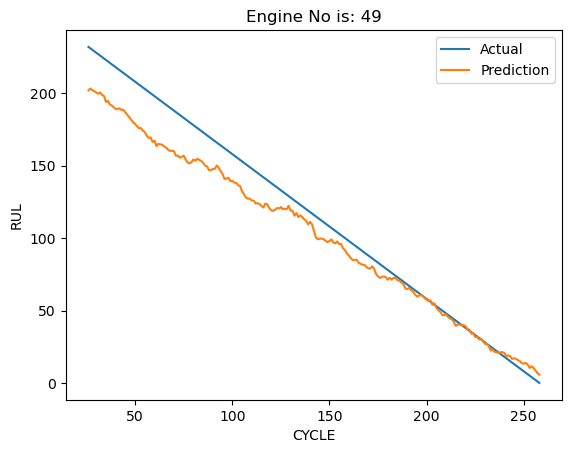



Shape of df for engine 99:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 10.560766983176865


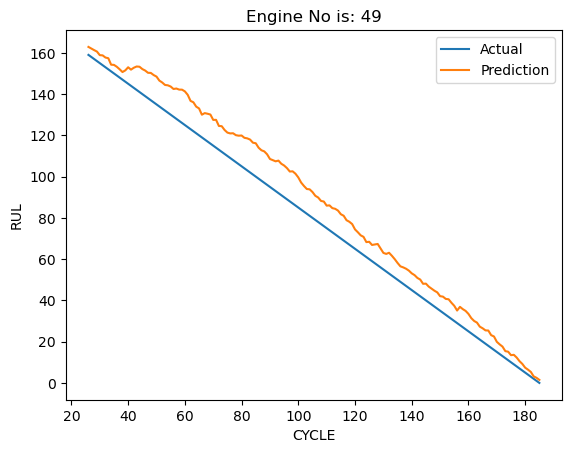



Shape of df for engine 87:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 3.1288183818981437


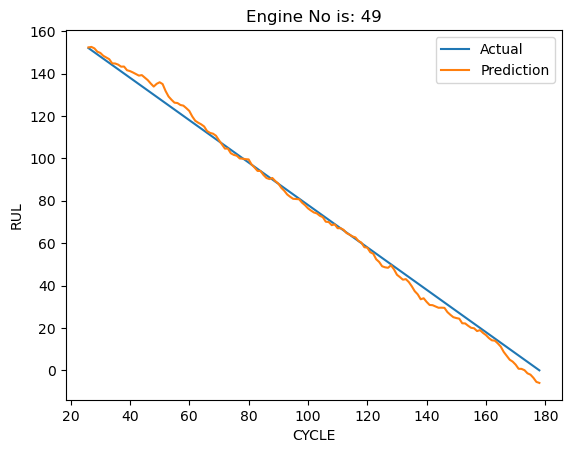



Shape of df for engine 62:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 3.8973320875544086


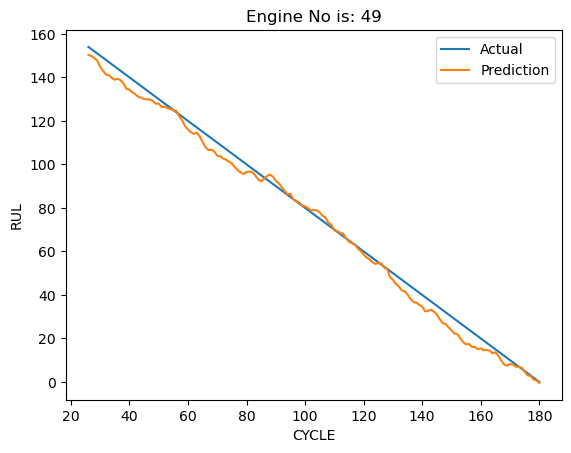



Shape of df for engine 79:  (20631, 15)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 8.00808731333311


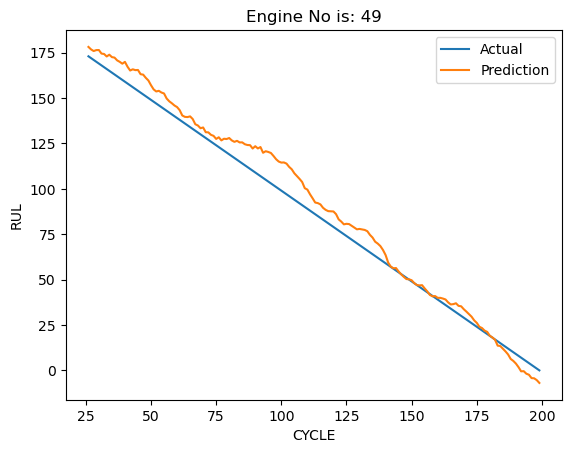



Shape of df for engine 63:  (20631, 15)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 6.770925748607303


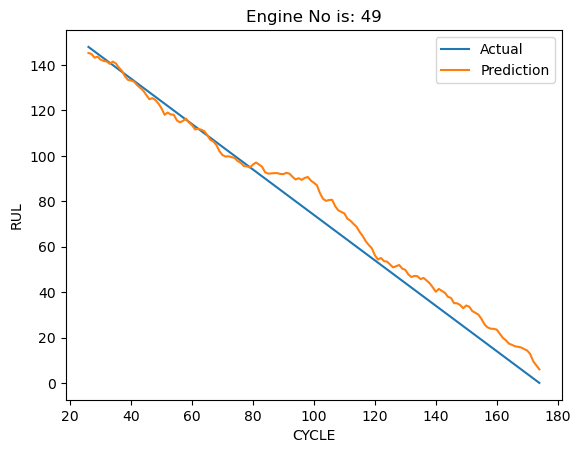



Shape of df for engine 65:  (20631, 15)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 15.036326264508167


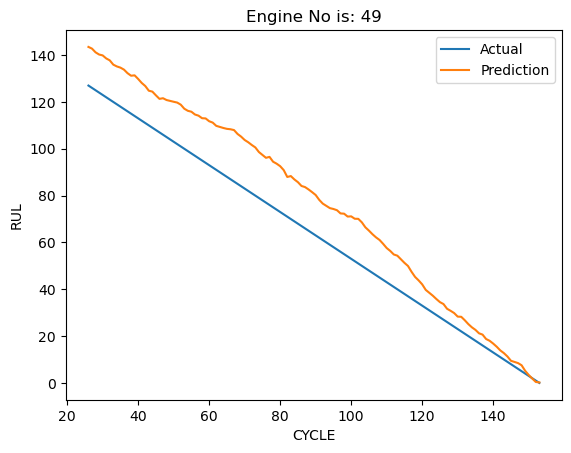

In [15]:
Train_no=1

n = np.random.randint(low=61,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_Conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed Data for RUL Pred/Processed_train_FD00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')